In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
inventory_data = pd.read_excel('./data/inventory_data_new.xlsx')

In [24]:
inventory_data.head()

,material,unitats_2022,vendes_2022,preu_venda_unitari_2022,unitats_2023,vendes_2023,preu_venda_unitari_2023,variacio_preu_venda_unitari_2022_2023,proporcio_variacio_preu_venda_unitari_2022_2023,data_darrera_entrada,dies_ultima_entrada,data_darrera_sortida,dies_ultima_sortida,diferencia_entrada_sortida,stock_final_2023,valor_total_stock_2023,cost_unitari_stock_2023
0,100500401.0,350.0,766.77,2.190771,300.0,931.00,3.103333,0.912562,0.416548,2023-10-09,83.0,2023-10-20,72.0,11.0,NaN,NaN,NaN
1,100500601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-21,740.0,2021-12-21,740.0,0.0,NaN,NaN,NaN
2,114230204.0,140000.0,8072.60,0.057661,70000.0,4489.80,0.064140,0.006479,0.112355,2023-11-28,33.0,2023-12-12,19.0,14.0,NaN,NaN,NaN
3,114230821.0,40000.0,1945.60,0.048640,NaN,NaN,NaN,NaN,NaN,2022-01-20,710.0,2022-01-27,703.0,7.0,NaN,NaN,NaN
4,114230822.0,1018500.0,54892.49,0.053895,885500.0,58951.87,0.066575,0.012679,0.235256,2024-02-29,-60.0,2024-02-14,-45.0,-15.0,66500.0,2292.96,0.034481


In [25]:
# Passar a data les columnes que ho requereixen
inventory_data['data_darrera_entrada'] = pd.to_datetime(inventory_data['data_darrera_entrada'], format='%Y-%m-%d')
inventory_data['data_darrera_sortida'] = pd.to_datetime(inventory_data['data_darrera_sortida'], format='%Y-%m-%d')

In [30]:
categorical_cols = ['material']
date_cols = ['data_darrera_entrada', 'data_darrera_sortida']
numerical_cols = list(set(inventory_data.columns) - set(categorical_cols) - set(date_cols))
for col in numerical_cols:
	inventory_data[col] = pd.to_numeric(inventory_data[col])

In [31]:
inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   material                                         1380 non-null   float64       
 1   unitats_2022                                     683 non-null    float64       
 2   vendes_2022                                      683 non-null    float64       
 3   preu_venda_unitari_2022                          639 non-null    float64       
 4   unitats_2023                                     721 non-null    float64       
 5   vendes_2023                                      722 non-null    float64       
 6   preu_venda_unitari_2023                          661 non-null    float64       
 7   variacio_preu_venda_unitari_2022_2023            508 non-null    float64       
 8   proporcio_variacio_preu_venda_unitari_

## Visualitzacions inicials

Text(0.5, 1.0, 'Correlation matrix')

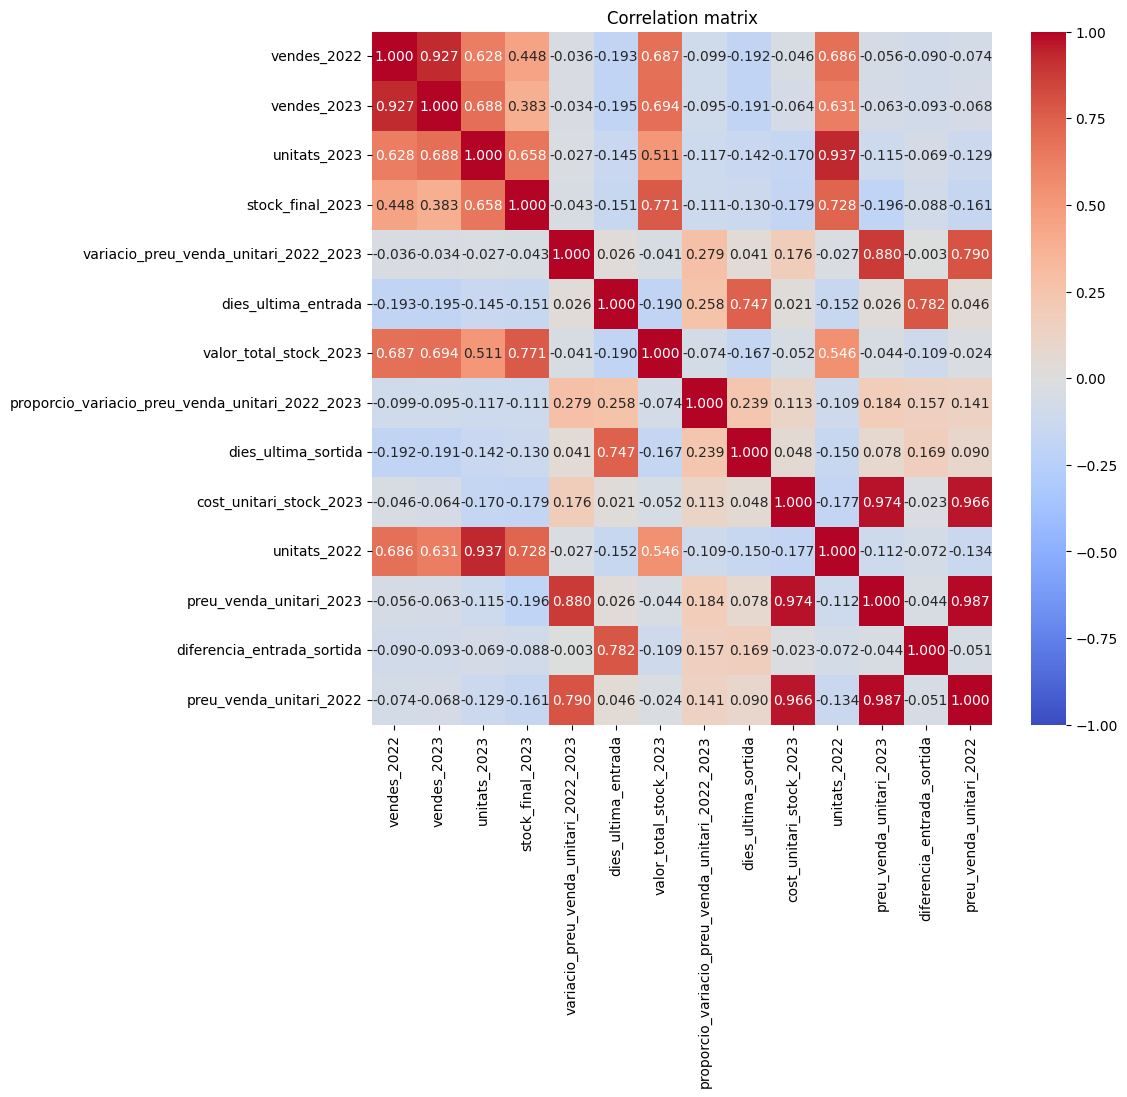

In [40]:
# Correlation matrix
correlation_matrix = inventory_data[numerical_cols].corr()
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', cbar=True, vmax=1, vmin=-1)
plt.title('Correlation matrix')

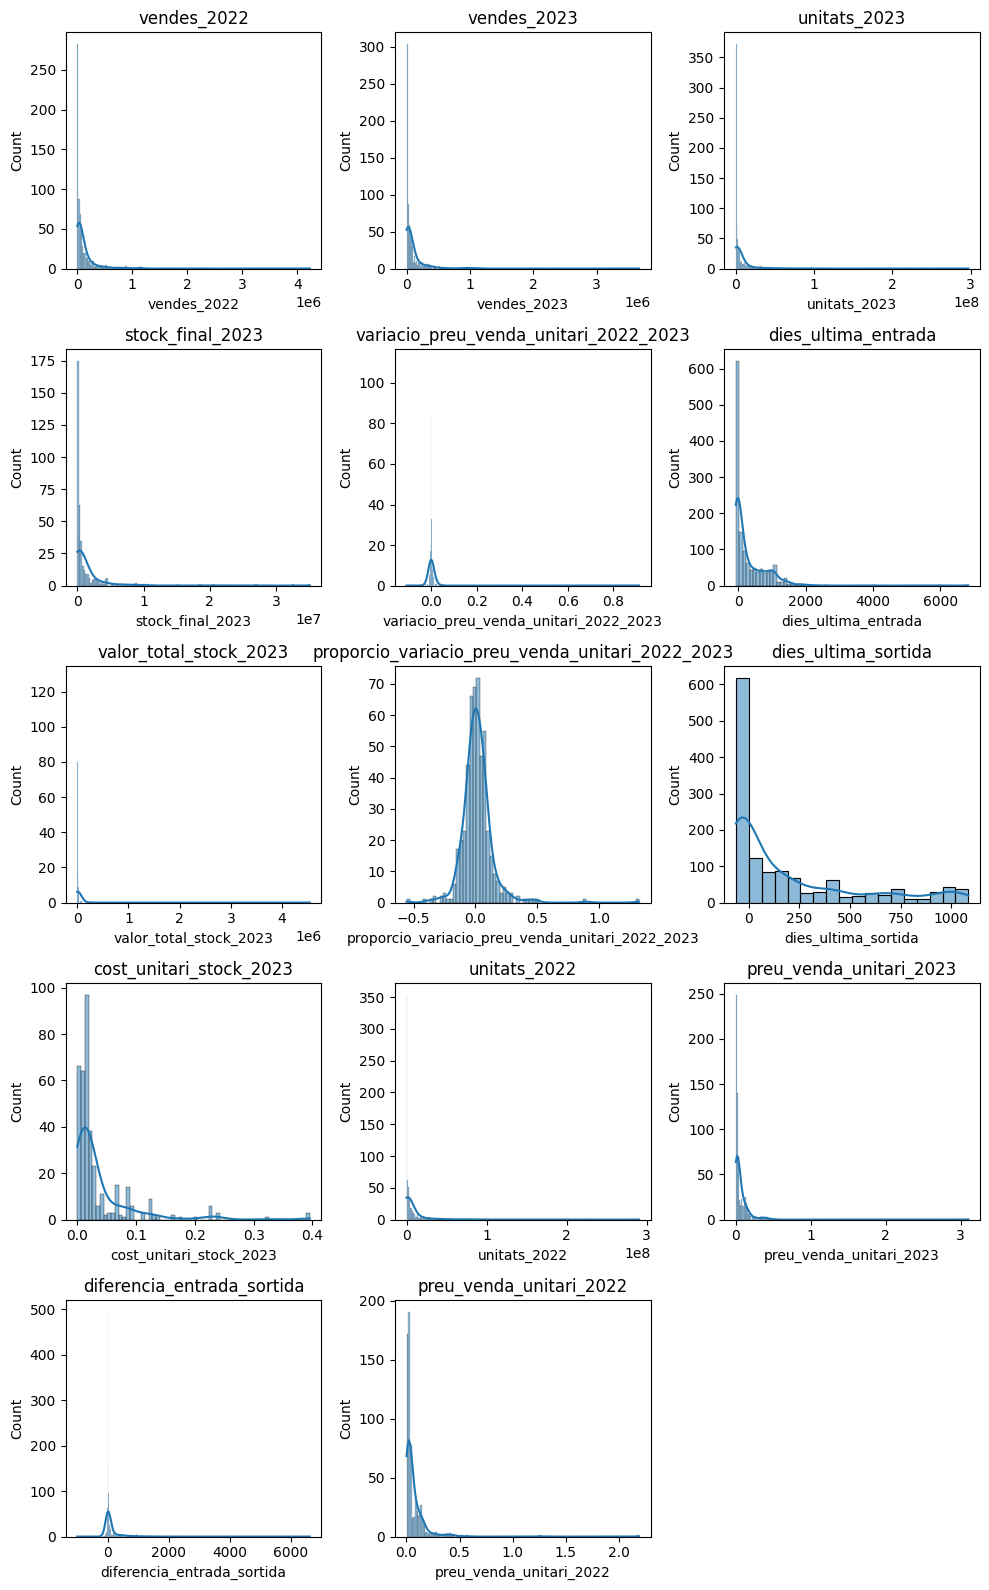

In [54]:
# Histograms of numerical columns with sns
total_cols = len(numerical_cols)
ncols = 3
nrows = total_cols // ncols + 1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 16))
for i, col in enumerate(numerical_cols):
	ax = axs[i // ncols, i % ncols]
	sns.histplot(inventory_data[col], ax=ax, kde=True)
	ax.set_title(col)

# Remove empty plots
for i in range(total_cols, nrows * ncols):
	fig.delaxes(axs[i // ncols, i % ncols])
plt.tight_layout()
plt.show()

## Models